In [29]:
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
import graphviz as gv
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt 
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

url = 'https://raw.githubusercontent.com/jimmyhm/BigData2021-1/master/16-Tarea/sonar.csv'

download = requests.get(url).content


df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#Veamos la cabecera de nuestro df
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [2]:
#Veamos el tamaño de nuestro df
display(df.shape)

#Veamos como se llaman cada columna
display(df.columns)

#Veamos el tipo de cada columna
df.info()

(208, 61)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Y'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

Gracias a df.info, podemos ver que nuestro dataframe no tiene NaN's

Al parecer nuestro df esta limpio y listo para hacer un analisis.

In [3]:
#Rectificamos que existan 111 minas y 97 rocas
print('Total de Minas y Rocas')
print(pd.value_counts(df['Y']))

Total de Minas y Rocas
M    111
R     97
Name: Y, dtype: int64


In [4]:
#Preparamos nuestra data para poder realizar el arbol
y = df.pop('Y')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
#Veamos con cuantos datos de la columna Y nos quedamos para entrenar el modelo.
print('Total de Minas y Rocas')
print(pd.value_counts(y_train))

Total de Minas y Rocas
M    76
R    69
Name: Y, dtype: int64


Estamos listos para crear nuestro árbol de clasificacion con nuestro df.

In [6]:
#Haremos uso de DecisionTreeClassifier para crear nuestro árbol
#Usaremos una profundida de 7 y unas 6 hojas maximo
arbol = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 7, max_leaf_nodes = 6)

#Ajustamos nuestro modelo con la data de entrenamiento
arbol_aj = arbol.fit(X_train, y_train)

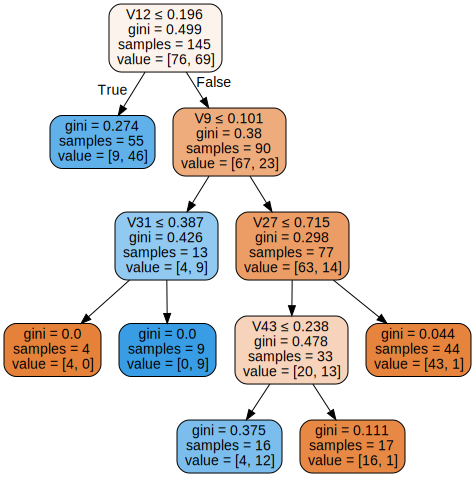

In [7]:
#Gráficamos nuestro árbol para darnos una idea de como se veria
dot_data = tree.export_graphviz(arbol_aj, out_file=None,
                     feature_names=X_train.columns,  
                     
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = gv.Source(dot_data)  
graph

In [8]:
#Aplicamos una predicción a nustra variable de respuesta
y_pred = arbol_aj.predict(X_test)
print('Proporcion de datos bien clasificados')
print(accuracy_score(y_test,y_pred))
print('Número de datos bien clasificados')
print(accuracy_score(y_test, y_pred, normalize=False))

Proporcion de datos bien clasificados
0.7142857142857143
Número de datos bien clasificados
45


Ahora haremos una optimización de hiperparametros para 'max_depth', 'max_leaf_nodes' y 'criterion'

In [9]:
param_grid = {
    'max_depth' : [5,6,7,8,9,10],
    'max_leaf_nodes' : [i for i in range(4,25,1)],
    'criterion':["gini", "entropy"]
}
modelo = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring = 'accuracy')
modelo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24]},
             scoring='accuracy')

In [10]:
print("Puntaje del modelo: %.3f" % modelo.score(X_test, y_test))
print ("Hiperparametros: ", str(modelo.best_params_))

Puntaje del modelo: 0.714
Hiperparametros:  {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 16}


Gracias GridSearchCV y a .best_params podemos apreciar que teniendo a 'gini' como criterio, una profundidad de 6 y un maximo de 16 hojas, obtenemos el mejor puntaje (que es de 0.71) para toda la lista de parametros que dimos. Claro, podriamos mejorar el puntaje colocando una lista un tanto mas grande.

Ahora se realizara un análisis costo complejidad

In [11]:
path = arbol.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Impureza vs Effective_alpha')

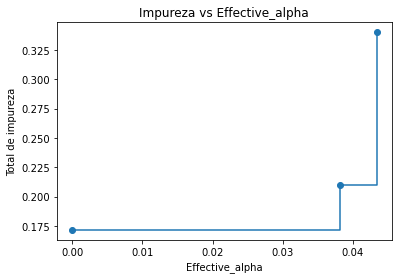

In [12]:
#Graficamos impureza vs ccp_alpha 
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective_alpha")
ax.set_ylabel("Total de impureza")
ax.set_title("Impureza vs Effective_alpha")

In [13]:
# ccp alpha vs número de hojas en el árbol
modelos = []
for ccp_alpha in ccp_alphas:
    mod = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    mod.fit(X_train, y_train)
    modelos.append(mod)
print("Numero de hojas(nodos) en el ultimo arbol es: {} con ccp_alpha: {}".format(
      modelos[-1].tree_.node_count, ccp_alphas[-1]))

Numero de hojas(nodos) en el ultimo arbol es: 3 con ccp_alpha: 0.15884168678461175


Text(0.5, 1.0, 'Numero de nodos vs Alpha')

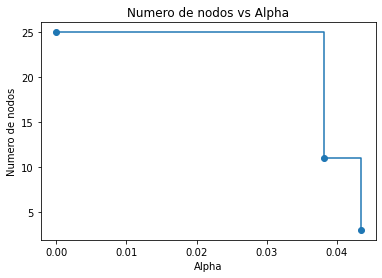

In [14]:
modelos = modelos[:-1]
ccp_alphas = ccp_alphas[:-1]

#Graficaremos primero numero de nodos vs ccp alpha
conteo_nodos = [mod.tree_.node_count for mod in modelos]
depth = [mod.tree_.max_depth for mod in modelos]
fig, ax = plt.subplots()
ax.plot(ccp_alphas, conteo_nodos, marker='o', drawstyle="steps-post")
ax.set_xlabel("Alpha")
ax.set_ylabel("Numero de nodos")
ax.set_title("Numero de nodos vs Alpha")

Ahora, graficaremos nuestras ccp_alhpa vs el accuracy en las muestras de prueba

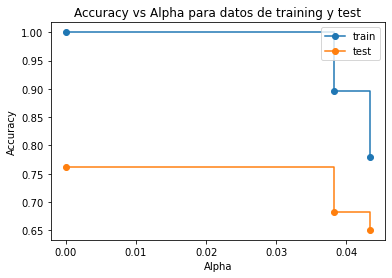

In [15]:
train_scores = [mod.score(X_train, y_train) for mod in modelos]
test_scores = [mod.score(X_test, y_test) for mod in modelos]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha para datos de training y test")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Podemos concluir que para nuestra muestra de entrenamiento, con un alpha del 0.04 nuestro accuracy es de 80%. Mientras que en la muestra de prueba con la misma alpha tenemos que baja hasta un %65, lo cual en el mundo real, es algo aceptable ya que dificilmente un modelo se acerca al 90%, inclusive al %95 aunque nuestro modelo podria mejorar.

Ahora ajustaremos los siguientes modelos para el mismo df.
Primero un RandomForest

In [16]:
randomForest = RandomForestClassifier(max_depth = 7, n_estimators = 100, random_state = 0)
randomForest.fit(X_train, y_train)
y_forest = randomForest.predict(X_test)

print('Proporcion de datos bien clasificados')
print(accuracy_score(y_test, y_forest))
print('Datos bien clasificados')
print(accuracy_score(y_test, y_forest, normalize=False))

Proporcion de datos bien clasificados
0.8571428571428571
Datos bien clasificados
54


Ahora ajustamos un modelo Bagging

In [17]:
#Usaremos una seed = 5
seed = 5
cart=tree.DecisionTreeClassifier(max_depth=7)

#Y un total de 50 arboles
n_trees = 50

#Realizamos el modelo
baggingModel = BaggingClassifier(base_estimator = arbol, n_estimators = n_trees, random_state=seed)
baggingModel.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        max_leaf_nodes=6),
                  n_estimators=50, random_state=5)

In [18]:
#Hacemos .predict sobre nuestro modelo en la muestra de entrenamiento
y_bag = baggingModel.predict(X_test)
print('Proporcion de datos bien clasificados')
print(accuracy_score(y_test, y_bag))
print('Datos bien clasificados')
print(accuracy_score(y_test, y_bag, normalize=False))

Proporcion de datos bien clasificados
0.7619047619047619
Datos bien clasificados
48


Por ultimo, ajustemos un modelo Boostrap

In [19]:
boostingModel = AdaBoostClassifier(base_estimator = arbol, n_estimators = n_trees, random_state = seed)
#Usaremos la misma seed al igual que el mismo numero de arboles que se usaron en el modelo Bagging
boostingModel.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         max_leaf_nodes=6),
                   random_state=5)

In [20]:
#Hacemos .predict sobre nuestro modelo en la muestra de entrenamiento
y_boost = boostingModel.predict(X_test)
print('Proporcion de datos bien clasificados')
print(accuracy_score(y_test, y_boost))
print('Datos bien clasificados')
print(accuracy_score(y_test, y_boost, normalize=False))

Proporcion de datos bien clasificados
0.8571428571428571
Datos bien clasificados
54


Finalmente, obtendremos la matriz de confusion de cada modelo asi como su curva ROC

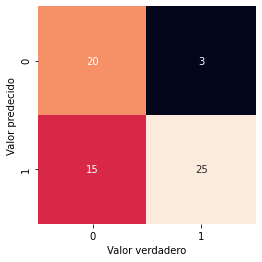

In [23]:
#Para nuestro arbol de clasificacion
mc = confusion_matrix(y_test, y_pred)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Valor verdadero')
plt.ylabel('Valor predecido');

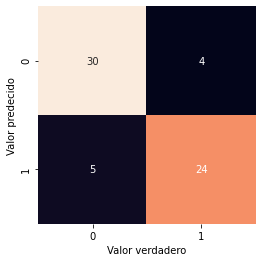

In [24]:
#Para nuestro Random Forest
mc = confusion_matrix(y_test, y_forest)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Valor verdadero')
plt.ylabel('Valor predecido');

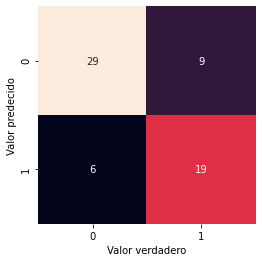

In [25]:
#Para nuestro Bagging
mc = confusion_matrix(y_test, y_bag)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Valor verdadero')
plt.ylabel('Valor predecido');

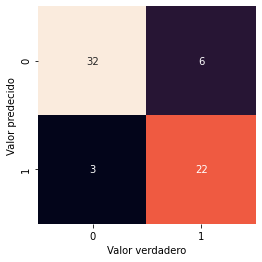

In [26]:
#Para nuestro Boostrap
mc = confusion_matrix(y_test, y_boost)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Valor verdadero')
plt.ylabel('Valor predecido');

In [36]:
pd.get_dummies(y_test)
y_test

,M,R
161,1,0
15,0,1
73,0,1
96,0,1
166,1,0
...,...,...
5,0,1
132,1,0
56,0,1
127,1,0


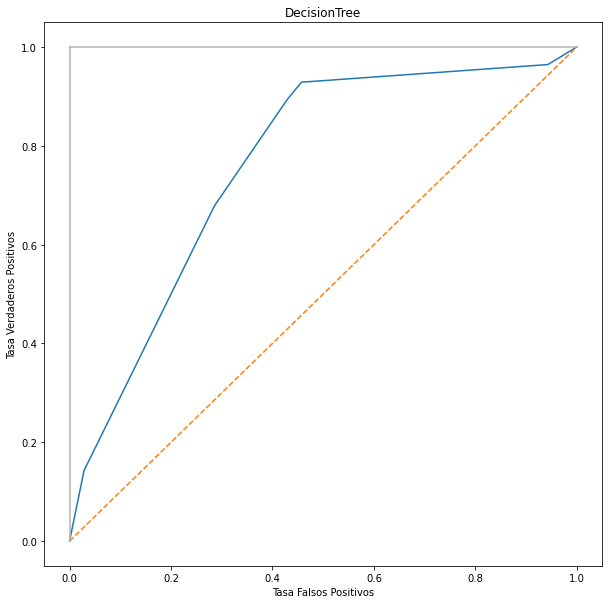

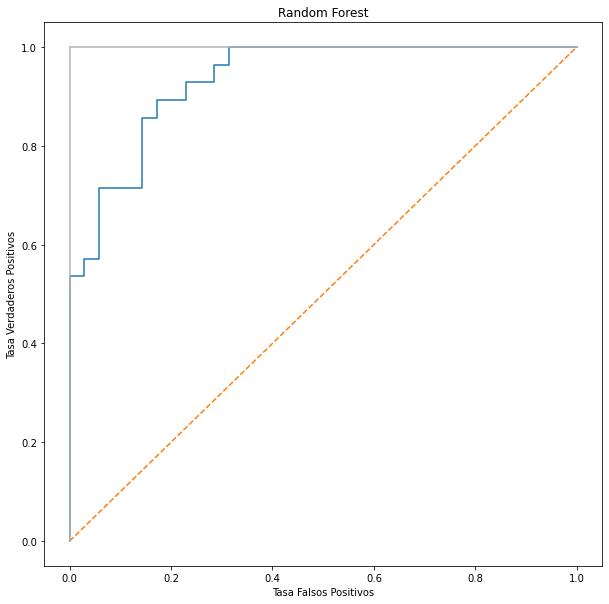

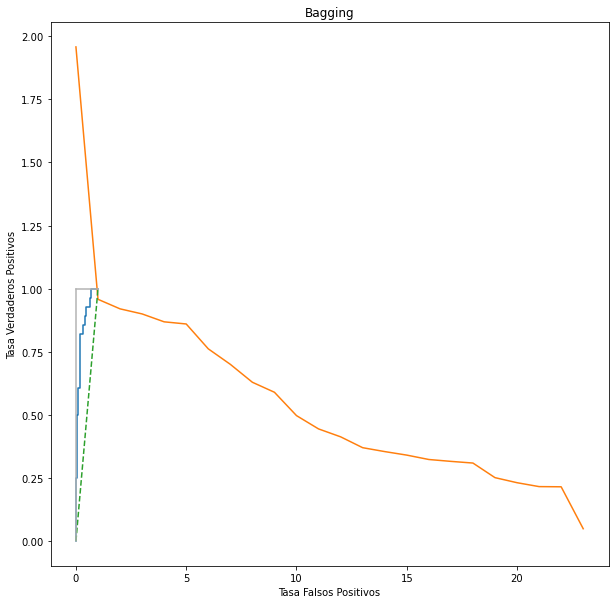

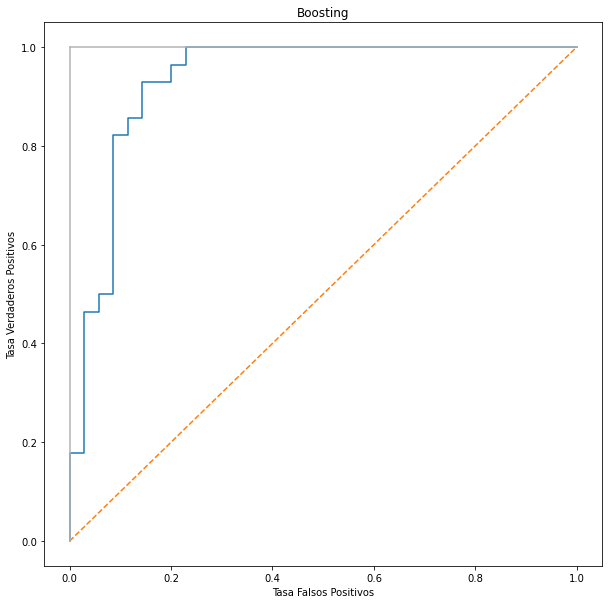

In [40]:


#Curvas ROC
#Primero obtenemos las probabilidades
y_score1 = arbol.predict_proba(X_test)[:,1]
y_score2 = randomForest.predict_proba(X_test)[:,1]
y_score3 = baggingModel.predict_proba(X_test)[:,1]
y_score4 = boostingModel.predict_proba(X_test)[:,1] 

# Creamos las tasas de los verdaderos y falsos positivos
tasa_falso_positivo1, tasa_verdadero_positivo1, threshold1 = roc_curve(y_test.values.argmax(axis=1), y_score1)
tasa_falso_positivo2, tasa_verdadero_positivo2, threshold2 = roc_curve(y_test.values.argmax(axis=1), y_score2)
tasa_falso_positivo3, tasa_verdadero_positivo3, threshold3 = roc_curve(y_test.values.argmax(axis=1), y_score3)
tasa_falso_positivo4, tasa_verdadero_positivo4, threshold4 = roc_curve(y_test.values.argmax(axis=1), y_score4)


plt.subplots(1, figsize=(10,10))
plt.title('DecisionTree')
plt.plot(tasa_falso_positivo1, tasa_verdadero_positivo1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Tasa Verdaderos Positivos')
plt.xlabel('Tasa Falsos Positivos')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Random Forest')
plt.plot(tasa_falso_positivo2, tasa_verdadero_positivo2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Tasa Verdaderos Positivos')
plt.xlabel('Tasa Falsos Positivos') 
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Bagging')
plt.plot(tasa_falso_positivo3, tasa_verdadero_positivo3, threshold3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Tasa Verdaderos Positivos')
plt.xlabel('Tasa Falsos Positivos') 
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Boosting')
plt.plot(tasa_falso_positivo4, tasa_verdadero_positivo4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Tasa Verdaderos Positivos')
plt.xlabel('Tasa Falsos Positivos') 
plt.show()